In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# %matplotlib inline

In [ ]:
data = pd.read_csv("/content/movie_metadata_cleaned.csv")

In [ ]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

In [ ]:
#GET THE TOP 10 DIRECTORS WITH MOST MOVIES

data["movie_count"] = data.groupby("director_name")["movie_title"].transform(pd.Series.count)             #Add a new column for movie count
data.sort_values("movie_count", inplace=True, ascending=False)                                            #Sort the values
top_dir=data.drop_duplicates(subset="director_name", inplace=False, keep='first')                         #Drop duplicated values         
print(top_dir[["director_name","movie_count"]][1:11])                                                     #Print a sorted table of directors and the number of their movie

          director_name  movie_count
2154   Steven Spielberg           26
4324        Woody Allen           22
2425    Martin Scorsese           20
772      Clint Eastwood           20
3891       Ridley Scott           17
254   Steven Soderbergh           16
441          Tim Burton           16
3599          Spike Lee           16
2839       Renny Harlin           15
1125       Oliver Stone           14


Text(0, 0.5, 'Gross Earnings')

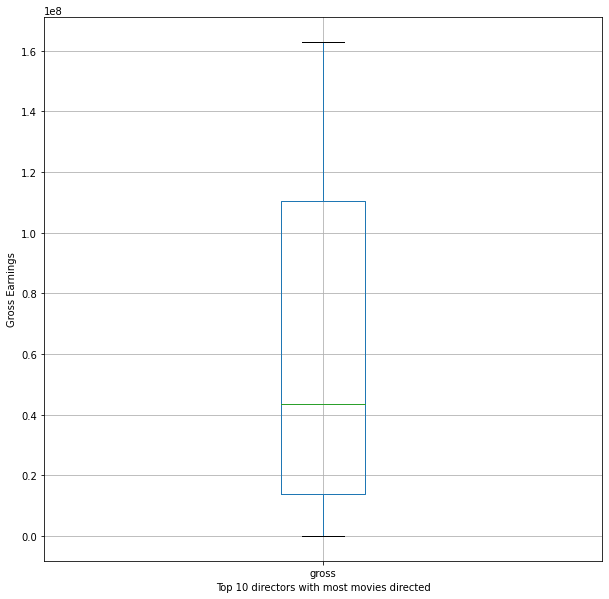

In [ ]:
#BOXPLOT THE GROSS EARNINGS OF THE TOP 10 DIRECTORS

bxplt_fig = plt.figure(figsize = (10, 10))                                                                #Configure the boxplot size
bxplt = top_dir[["gross", "director_name"]][1:11]                                                         #Assign the columns for the boxplot values
bxplt.boxplot()                                                                                           #Create the boxplot
plt.xlabel("Top 10 directors with most movies directed")                                               
plt.ylabel("Gross Earnings")


## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

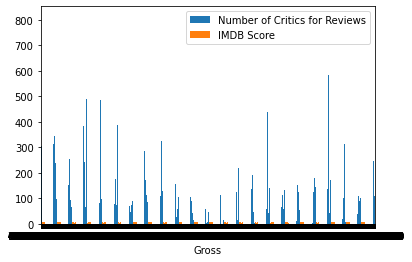

In [87]:
# GRAPH THE GIVEN VARIABLES
new_df = data[['num_critic_for_reviews','imdb_score','gross']].copy()                         #Create a new dataframe for the given variables from the original dataframe
new_df.rename(columns = {'num_critic_for_reviews':'Number of Critics for Reviews',            #Rename the column name of the new dataframe
                         'imdb_score':'IMDB Score', 
                         'gross': 'Gross'}, inplace = True)
new_df.plot.bar(x='Gross', rot=0)                                                             #Create a bar graph with the given variables 

## Compute Sales (Gross - Budget), add it as another column

In [82]:
#GET THE SALES AND ADD IT AS ANOTHER COLUMN
total_sale = data["gross"] - data["budget"]                        #Subtract gross from budget and asign the difference to a variable
data["movie_sales"] = total_sale                                   #Create a new colunm named 'movie_sales' then asign the difference as the value
data.head(10)                                                      #Display the first 2 rows


,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_count,movie_sales
4517,4517,b'Wolf Creek ',Color,0,2.0,0.0,0.0,206.0,John Jarratt,511.0,...,Australia,0,0.0,0.0,457.0,7.1,2.00,954.0,104,0.0
3604,3604,b'War & Peace ',Color,0,10.0,0.0,0.0,502.0,Tuppence Middleton,1000.0,...,UK,TV-14,0.0,0.0,888.0,8.2,16.00,11000.0,104,0.0
1175,1175,"b""McHale's Navy """,Black and White,0,4.0,30.0,0.0,253.0,Gavin MacLeod,870.0,...,USA,TV-G,0.0,0.0,284.0,7.5,4.00,455.0,104,0.0
4327,4327,b'Wings ',Color,0,19.0,30.0,0.0,424.0,Tim Daly,685.0,...,USA,0,0.0,0.0,511.0,7.3,1.33,1000.0,104,0.0
2828,2828,b'The Border ',Color,0,1.0,41.0,0.0,2.0,Marian Dziedziel,70.0,...,Poland,0,0.0,0.0,2.0,7.4,0.00,64.0,104,0.0
4119,4119,b'The Grand ',Color,0,4.0,60.0,0.0,23.0,Amanda Mealing,40.0,...,UK,0,0.0,0.0,37.0,7.6,1.33,450.0,104,0.0
2824,2824,b'Dekalog ',Color,0,53.0,55.0,0.0,2.0,Olaf Lubaszenko,20.0,...,Poland,TV-MA,0.0,0.0,3.0,9.1,1.33,0.0,104,447093.0
1265,1265,b'Arthur ',Color,0,3.0,30.0,0.0,12.0,Melissa Altro,51.0,...,Canada,TV-Y,0.0,0.0,21.0,7.4,1.33,301.0,104,0.0
3579,3579,b'Gomorrah ',Color,0,10.0,55.0,0.0,5.0,Fortunato Cerlino,18.0,...,Italy,TV-MA,0.0,0.0,9.0,8.7,1.85,0.0,104,0.0
4115,4115,b'BrainDead ',Color,0,7.0,44.0,0.0,246.0,Megan Hilty,786.0,...,USA,0,0.0,0.0,341.0,7.9,16.00,3000.0,104,0.0


## Which directors garnered the most total sales?

In [83]:
data.groupby(['director_name'])['movie_sales'].sum()
data.sort_values("movie_sales", inplace=True, ascending=False)    
new_df1 = data[['director_name','budget','gross','movie_sales']].copy()       
new_df1.head(10) 

,director_name,budget,gross,movie_sales
0,James Cameron,237000000.0,760505847.0,523505847.0
29,Colin Trevorrow,150000000.0,652177271.0,502177271.0
26,James Cameron,200000000.0,658672302.0,458672302.0
3024,George Lucas,11000000.0,460935665.0,449935665.0
3080,Steven Spielberg,10500000.0,434949459.0,424449459.0
794,Joss Whedon,220000000.0,623279547.0,403279547.0
17,Joss Whedon,220000000.0,623279547.0,403279547.0
509,Roger Allers,45000000.0,422783777.0,377783777.0
240,George Lucas,115000000.0,474544677.0,359544677.0
66,Christopher Nolan,185000000.0,533316061.0,348316061.0


## Plot sales and average likes as a scatterplot. Fit it with a line.

Text(0, 0.5, 'Y-axis')

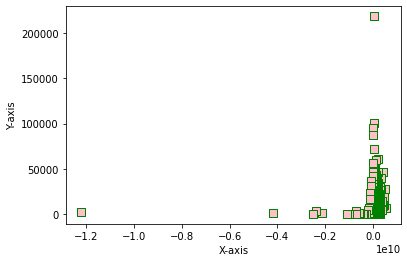

In [84]:
data['average_likes'] = data[['director_facebook_likes',
                              'actor_3_facebook_likes',
                              'actor_2_facebook_likes',
                              'actor_1_facebook_likes',
                              'movie_facebook_likes',
                              'cast_total_facebook_likes']].mean(axis=1)
data.head()
data.plot.scatter(x = 'movie_sales', y = 'average_likes',
                  c ="pink",
                  linewidths = 1,
                  marker ="s",
                  edgecolor ="green",
                  colormap='viridis',
                  s = 50)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [ ]:
data.groupby(['genres'])['movie_sales'].sum()

genres
Action                                                            -233374560.0
Action|Adventure                                                   550031278.0
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy             -56403089.0
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller     -7000000.0
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi               10647016.0
                                                                      ...     
Sci-Fi|Thriller                                                      3936530.0
Thriller                                                           -36661182.0
Thriller|War                                                        -6700000.0
Thriller|Western                                                     -750000.0
Western                                                             12737862.0
Name: movie_sales, Length: 915, dtype: float64

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [ ]:
data['average_actor_likes'] = data[['actor_3_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes']].mean(axis=1)
data.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,movie_count,movie_sales,average_likes,avg_actor_likes,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,2009.0,936.0,7.9,1.78,33000.0,7,523505847.0,6770.833333,930.333333,930.333333
29,29,b'Jurassic World',Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,...,2015.0,2000.0,7.0,2.00,150000.0,2,502177271.0,27470.500000,2000.000000,2000.000000
26,26,b'Titanic',Color,James Cameron,315.0,189.0,0.0,794.0,Kate Winslet,29000.0,...,1997.0,14000.0,7.7,2.35,26000.0,7,458672302.0,19169.500000,14598.000000,14598.000000
3024,3024,b'Star Wars: Episode IV - A New Hope',Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,...,1977.0,1000.0,8.7,2.35,33000.0,5,449935665.0,9831.500000,4168.000000,4168.000000
3080,3080,b'E.T. the Extra-Terrestrial',Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,...,1982.0,725.0,7.9,1.85,34000.0,26,424449459.0,8824.166667,711.333333,711.333333


## Copying the whole dataframe

In [ ]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
normal_array = scaler.fit_transform(df[['num_critic_for_reviews',
                                        'duration',
                                        'director_facebook_likes',
                                        'actor_3_facebook_likes',
                                        'actor_1_facebook_likes',
                                        'gross',
                                        'num_voted_users',
                                        'cast_total_facebook_likes',
                                        'facenumber_in_poster',
                                        'num_user_for_reviews',
                                        'budget',
                                        'title_year',
                                        'actor_2_facebook_likes',
                                        'imdb_score',
                                        'aspect_ratio',
                                        'movie_facebook_likes',
                                        'movie_count',
                                        'movie_sales',
                                        'average_likes']])
normal_df = pd.DataFrame(normal_array)
print(normal_df)

            0         1         2         3         4         5         6   \
0     0.889299  0.941799  0.000000  0.037174  0.001563  1.000000  0.524453   
1     0.792128  0.656085  0.016591  0.043478  0.004687  0.857557  0.247496   
2     0.387454  1.000000  0.000000  0.034522  0.045313  0.866098  0.469329   
3     0.346863  0.661376  0.000000  0.021913  0.017188  0.606091  0.539184   
4     0.264453  0.634921  0.636364  0.023826  0.001345  0.571921  0.166791   
...        ...       ...       ...       ...       ...       ...       ...   
3116  0.129151  0.544974  0.003545  0.004391  0.000763  0.000540  0.008120   
3117  0.214022  0.708995  0.272727  0.032391  0.001395  0.003022  0.131111   
3118  0.089791  0.708995  0.002045  0.000000  0.000014  0.000258  0.003312   
3119  0.446494  0.582011  0.026545  0.003217  0.000983  0.002895  0.040761   
3120  0.253383  0.687831  0.000000  0.033435  0.020313  0.040304  0.107549   

            7         8         9         10        11        1